# Visualization & Hypothesis Testing
A project aiming at helping Alzheimer’s patients to remember the order of daily tasks did an
experiment. The project designed different means to help the patients to improve their
memory. In this experiment, they focus on a technique using visuals and one using visuals
and intense verbal rehearsal. Each subject will be tested only once.
The experimenters assigned patients to two groups (each group using one of the
aforementioned techniques) and accounted the number of words the subjects could remember.

The experimenters set up the following hypotheses

* H0: There is no difference in average number of words remembered applying visuals vs.
visuals and intense verbal rehearsal.

* H1: The average number of remembered words differs between subjects applying visuals
vs. visuals and intense verbal rehearsal.

The raw experimental results are:

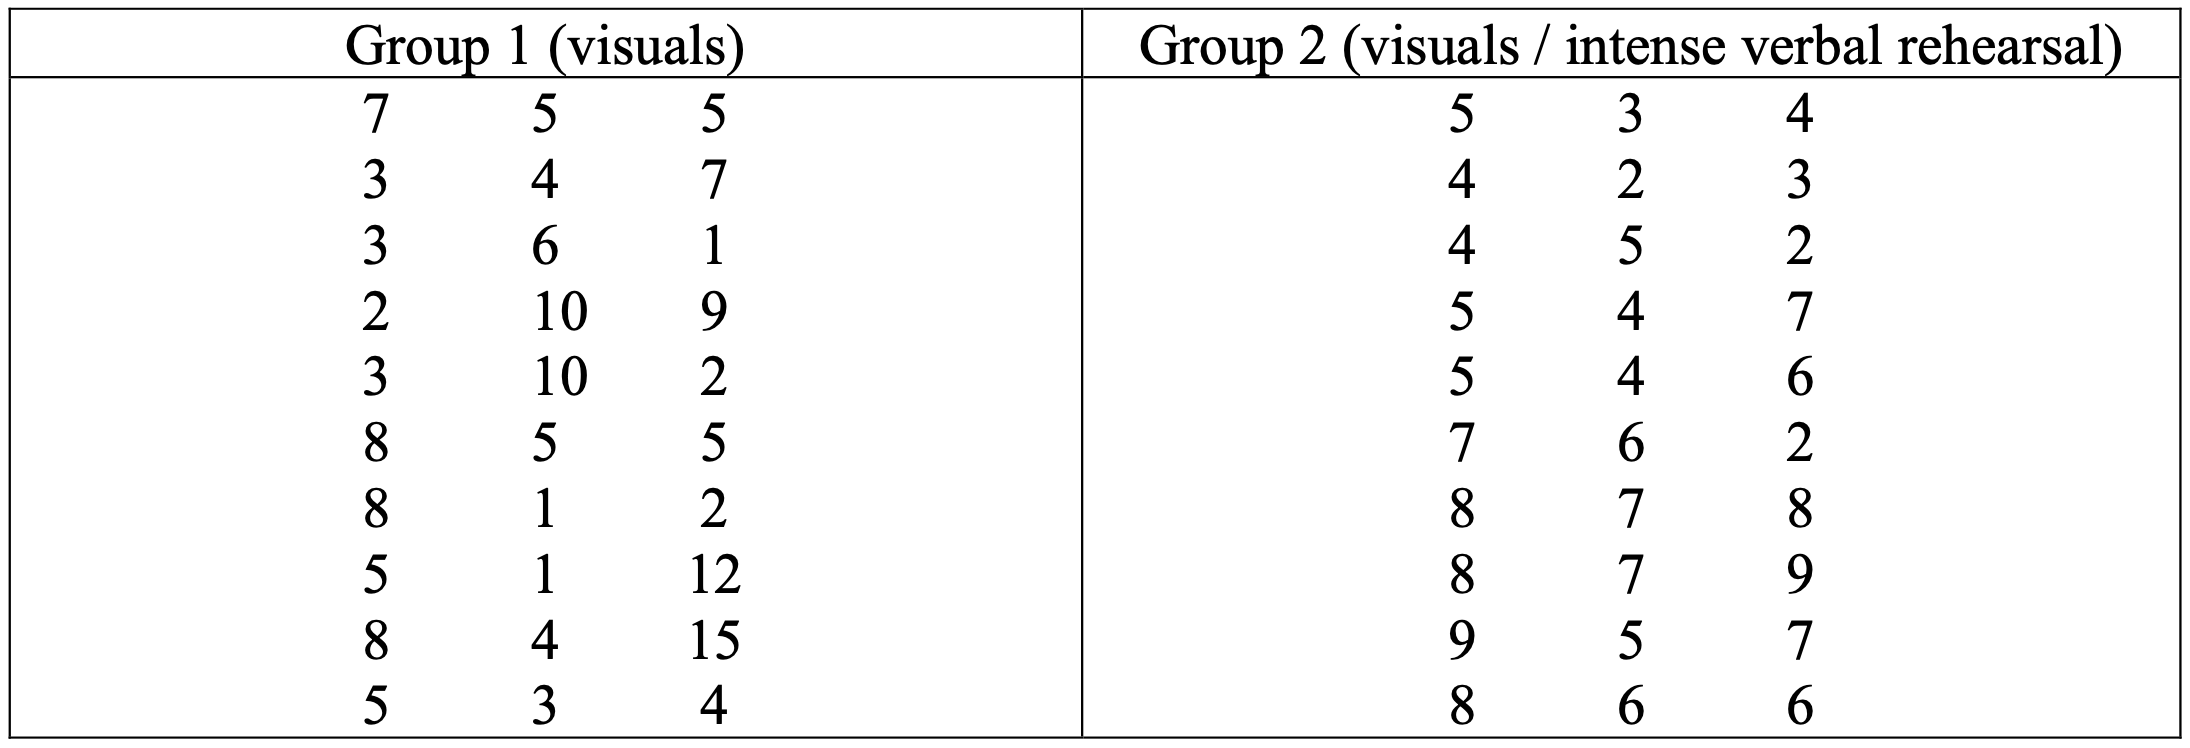

Provide results for the following sub-tasks.
* 1) Depict histograms for both groups.
* 2) Depict a box plot for both groups. Precisely define your whiskers and outliers (if
applicable).
* 3) Apply a t-test with two samples for a 5% level of significance. Can H0 be accepted?

## Setup
As each subject was only tested once, it can be assumed that 30 individual measurements are available for each group. These are saved in lists for the following calculations (for group 1 and group 2 respectively). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

g1 = np.array([
    7,  5,  5,
    3,  4,  7, 
    3,  6,  1, 
    2, 10,  9, 
    3, 10,  2, 
    8,  5,  5, 
    8,  1,  2, 
    5,  1, 12, 
    8,  4, 15, 
    5,  3,  4
])

g2 = np.array([
    5,  3,  4, 
    4,  2,  3, 
    4,  5,  2, 
    5,  4,  7, 
    5,  4,  6,
    7,  6,  2, 
    8,  7,  8, 
    8,  7,  9, 
    9,  5,  7,
    8,  6,  6
])

## Histogramm
The histogram shows the distribution of how often people were able to memorize a certain number of words.

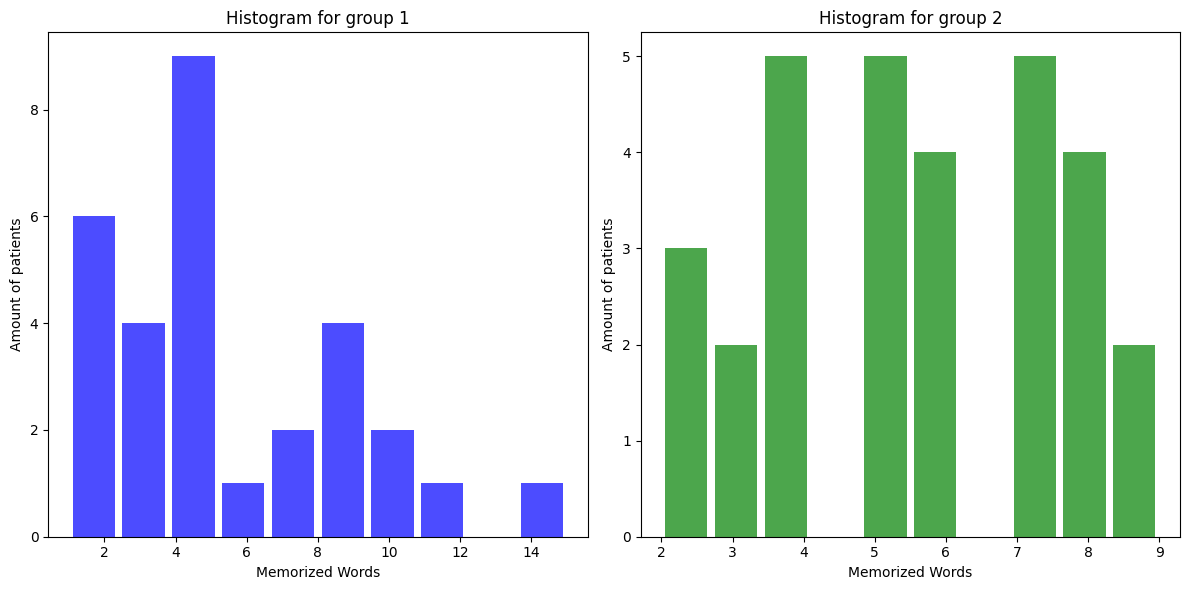

In [2]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(g1, bins=10, color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram for group 1')
plt.xlabel('Memorized Words')
plt.ylabel('Amount of patients')

plt.subplot(1, 2, 2)
plt.hist(g2, bins=10, color='green', alpha=0.7, rwidth=0.85)
plt.title('Histogram for group 2')
plt.xlabel('Memorized Words')
plt.ylabel('Amount of patients')

plt.tight_layout()
plt.show()

## Box Plot
Each box plot shows the median (central line), the interquartile range (the box), and the whiskers. The whiskers extend to 1.5 times the IQR, making it easier to spot potential outliers.

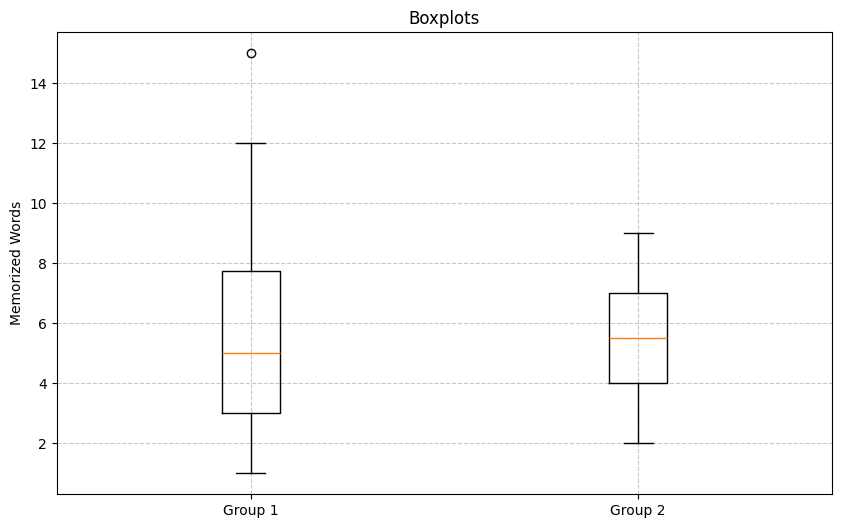

In [3]:
plt.figure(figsize=(10, 6))
plt.boxplot([g1, g2], tick_labels=['Group 1', 'Group 2'], whis=1.5)

plt.title('Boxplots')
plt.ylabel('Memorized Words')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## Example for G1
As the upper whisker is constrained to 14.875, the value 15 for group 1 is identified as an outlier. Given that this leaves 12 as the maximum value within the whisker, this is used as the limit in the plot. 

The same principle applies to the lower limit. As no value is negative, no outliers are displayed and therefore the minimum value of 1 is used as the lower limit.

In [4]:
Q1 = np.percentile(g1, 25)
Q3 = np.percentile(g1, 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
outliers = g1[(g1 < lower_whisker) | (g1 > upper_whisker)]

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")
print(f"Outliers: {outliers}")

Q1: 3.0
Q3: 7.75
IQR: 4.75
Lower Whisker: -4.125
Upper Whisker: 14.875
Outliers: [15]


## T-Test
At a significance level of 5 % (α = 0.05), the p-value of 0.8914 is well above the threshold value of 0.05. Therefore, the null hypothesis (H0) cannot be rejected.

The t-statistic indicates the magnitude and direction of the difference between the sample means in relation to the variability in the samples. A negative t-statistic means that the mean of group 1 is slightly smaller than the mean of group 2, but the magnitude (-0.1371) is quite small, indicating that the difference is small.

In [5]:
t_stat, p_value = ttest_ind(g1, g2)
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
alpha = 0.05
if p_value > alpha:
    print("The null hypothesis can be accepted: There is no significant difference between the groups.")
else:
    print("The null hypothesis is rejected: There is a significant difference between the groups.")

T-Statistic: -0.1371
P-Value: 0.8914
The null hypothesis can be accepted: There is no significant difference between the groups.
